#Customer member analysis to determine how much influence a company has on its revenue


### 🧠Background
- Is it effective if we create members for customers?

- Is the transaction time (hour or day) different between member and non-member customers?

- Of all the existing branches, which branch customers have the least to register as members?



### 📁 Dataset
- Source: dummy dataset
- Number of rows and columns: 1000 rows, 17 columns
- Important features:
  - Invoice ID: Column that contains a unique number that distinguishes each transaction
  - Branch: Column that contains the branch from which
  - City: Column that contains the city name
  - Customer Type: Column that contains whether the transaction comes from a member customer or a non-member customer
  - Gender: Column that contains the gender of the customer
  - Product Line: Column that contains information about the product category
  - Unit price: Column that contains the price per unit.
  - Quantity: Column that contains the number of product purchases
  - Tax 5%: Column that contains the tax value of 5% of the unit price.
  - Total: Column that contains the price (unit price * quantity) + tax
  - Date: Column that contains the transaction date
  - Time: Column that shows the transaction time
  - Payment: Column that shows the type of payment method for each transaction by the customer
  - Cogs: Total costs incurred by the company to produce or obtain goods or services sold
  - Gross margin percentage: Percentage metric that measures the efficiency of the company in generating profits from operational activities.
  - gross income: total income received by a person or company in a certain period, before deducting taxes, operating costs, or other deductions.
  - rating: an assessment or ranking that indicates the level of quality, capability, or popularity of a product.

In [12]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_supermarket = pd.read_csv("supermarket_sales.csv")
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df_supermarket.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,2.649463e+01,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431e+00,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,2.458853e+02,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,2.341765e+02,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,6.131498e-14,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,1.170883e+01,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580e+00,4.000000,5.500000,7.000000,8.500000,10.000000


In [21]:
df = df_supermarket.copy()

outliers_dict = {}

for col in df.select_dtypes(include='number').columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    if not outliers.empty:
        outliers_dict[col] = {
            'count': len(outliers),
            'indexes': outliers.index.tolist()
        }

if outliers_dict:
    for k, v in outliers_dict.items():
        print(f"Colomn: {k}")
        print(f" - outlier Total: {v['count']}")
        print(f" - Index outlier: {v['indexes']}\n")
else:
    print("Tidak ada outlier yang terdeteksi.")



Colomn: Tax 5%
 - outlier Total: 9
 - Index outlier: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Colomn: Total
 - outlier Total: 9
 - Index outlier: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Colomn: cogs
 - outlier Total: 9
 - Index outlier: [166, 167, 350, 357, 422, 557, 699, 792, 996]

Colomn: gross income
 - outlier Total: 9
 - Index outlier: [166, 167, 350, 357, 422, 557, 699, 792, 996]



It appears that there are several columns that contain outliers, for this data, it should not be called an outlier, because this is a sales transaction. With different sales quantities, it can make all values ​​vary and look very unequal.

#Has it been effective to create a member for customers?

Distribution of Number of Member vs Normal Customers

In [7]:
df_supermarket['Customer type'].value_counts(normalize=True) * 100

,proportion
Customer type,
Member,50.1
Normal,49.9


Average Purchase: Total and Number of Items

In [8]:
df_supermarket.groupby('Customer type')[['Total', 'Quantity']].mean()

,Total,Quantity
Customer type,,
Member,327.791305,5.558882
Normal,318.122856,5.460922


Rata-rata Rating per Customer Type

In [9]:
df_supermarket.groupby('Customer type')['Rating'].mean()

,Rating
Customer type,
Member,6.940319
Normal,7.005210


Total Income (Gross Income) from Each Customer Type

In [10]:
df_supermarket.groupby('Customer type')['gross income'].sum()

,gross income
Customer type,
Member,7820.164
Normal,7559.205


Product Type Distribution between Member vs Normal

In [11]:
pd.crosstab(df_supermarket['Product line'], df_supermarket['Customer type'])

Customer type,Member,Normal
Product line,,
Electronic accessories,78,92
Fashion accessories,86,92
Food and beverages,94,80
Health and beauty,73,79
Home and lifestyle,83,77
Sports and travel,87,79


Visualization: Total Purchases Boxplot

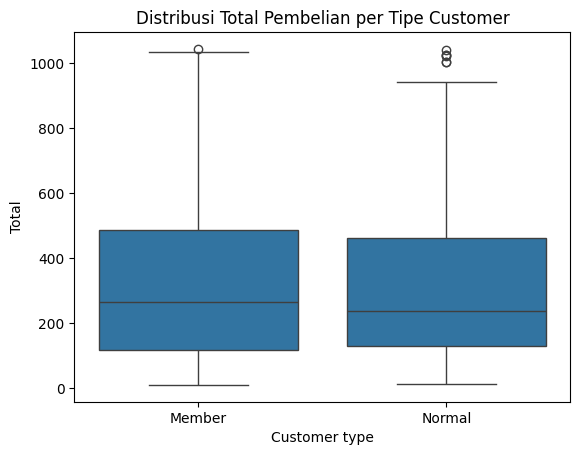

In [13]:
sns.boxplot(data=df_supermarket, x='Customer type', y='Total')
plt.title('Distribusi Total Pembelian per Tipe Customer')
plt.show()

It can be seen from several subcategories that are described that:
- The number of member customers and the number of non-members are not far apart, members 50.1%, while non-members 49.9%
- The average purchase of members and non-members and quantity, it can be seen that members' purchases exceed those of non-members. It is proven that members buy more than non-members.
- For the rating of assessments from members and non-members, there are more satisfaction assessments of the product, namely that non-members are more satisfied.
- Gross income from members and non-members, contributes more to income, namely from members
- If you look at the distribution of product lines, members buy more Food and beverages, home and lifestyle, and sports and travel. The rest is dominated by non-members.

From here we can see that the transaction dataset for the number of members and non-members is not significantly different. However, it can be seen that the number of member purchases is indeed more than non-members. From here we can provide another campaign to attract non-member customers to become members so that the percentage of members and non-members can be more significant. However, there are several things that need to be re-evaluated, namely the quality of the product or the product itself. seen from the product rating, the assessment from members looks less than satisfactory. It is necessary to follow up on what makes member customers give less than satisfactory assessments than non-members.


#Are transaction times (hours or days) different between member and non-member customers?

<ipython-input-22-46b6b552d247>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Time'] = pd.to_datetime(df['Time'])


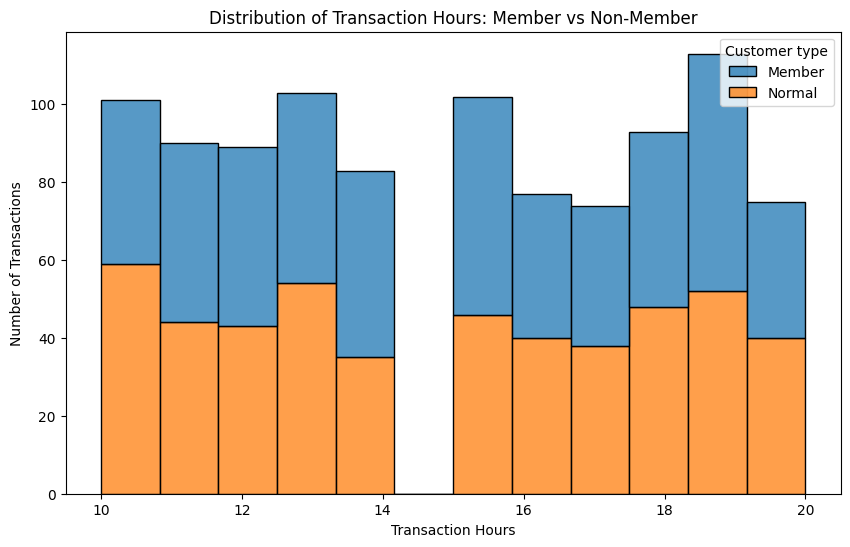

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = df['Time'].dt.hour

df['Day'] = df['Date'].dt.day_name()

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Hour', hue='Customer type', multiple='stack', bins=12)
plt.title("Distribution of Transaction Hours: Member vs Non-Member")
plt.xlabel("Transaction Hours")
plt.ylabel("Number of Transactions")
plt.show()

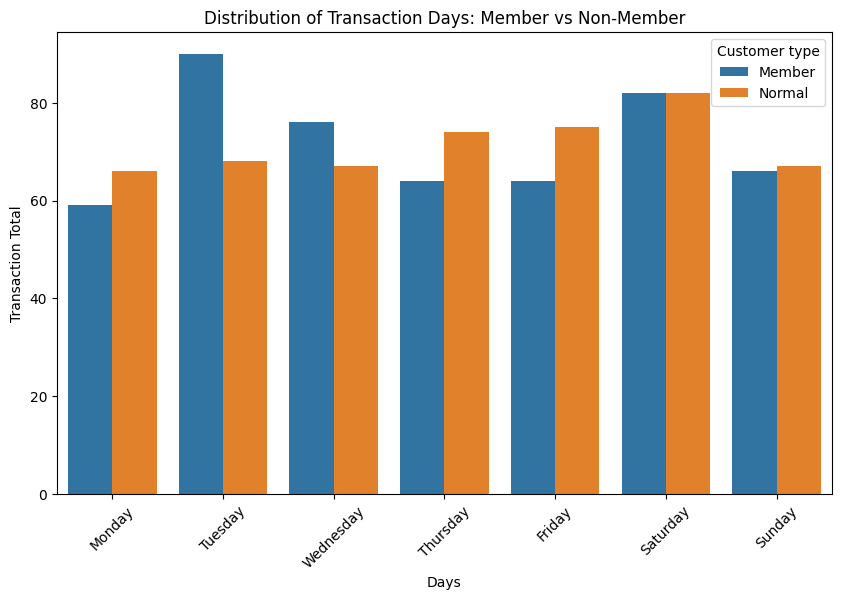

In [23]:
hari_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Day', hue='Customer type', order=hari_order)
plt.title("Distribution of Transaction Days: Member vs Non-Member")
plt.xlabel("Days")
plt.ylabel("Transaction Total")
plt.xticks(rotation=45)
plt.show()

From the graph results above, it can be seen that member customers are more often active to buy between 10 - 14, and 15 - 19.
and from the second graph results, it can be seen that member customers are more numerous and active on Tuesdays and Saturdays.
The recommendation that can be given is to provide a special campaign for members at those hours or on those days, so that it can attract more member customers to be able to make higher transactions.

#Of all the existing branches, which branch has the fewest customers registering as members?

In [25]:
branch_member_count = df[df['Customer type'] == 'Member'].groupby('Branch').size().reset_index(name='Number of Member')

print(branch_member_count)

  Branch  Number of Member
0      A               167
1      B               165
2      C               169


In [26]:
branch_member_count_sorted = branch_member_count.sort_values(by='Number of Member', ascending=True)

print("Branch with the least number of members:")
print(branch_member_count_sorted.head(1))

Branch with the least number of members:
  Branch  Number of Member
1      B               165


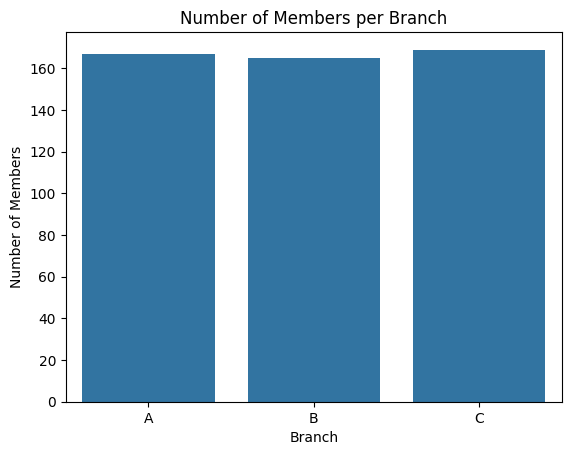

In [24]:
sns.barplot(data=branch_member_count, x='Branch', y='Jumlah Member')
plt.title('Number of Members per Branch')
plt.xlabel('Branch')
plt.ylabel('Number of Members')
plt.show()

In [29]:
total_transaksi_per_cabang = df.groupby('Branch').size().reset_index(name='Transaction Total')

df_merge = pd.merge(branch_member_count, total_transaksi_per_cabang, on='Branch')
df_merge['Member Percentage'] = (df_merge['Number of Member'] / df_merge['Transaction Total']) * 100

print(df_merge.sort_values(by='Member Percentage'))

  Branch  Number of Member  Transaction Total  Member Percentage
0      A               167                340          49.117647
1      B               165                332          49.698795
2      C               169                328          51.524390


From the information above, it can be concluded that the number of members in each branch is not too significant. It needs to be increased again for each branch to provide a campaign to members, so that non-members can be interested in joining as members.

#✨ Conclusion:

1. Customer members have been proven to contribute significantly to revenue.
    This shows that the member program is quite effective financially.

2. There are different behavioral patterns between members and non-members in terms of transaction time.
    This can be used to develop a more targeted time-based promotion strategy.

3. The distribution of members is not evenly distributed across all branches.
    Some branches still have the potential for growth in the number of members if a more intensive approach is taken (eg: local referral programs or special member events).

###The membership program has been proven to contribute significantly to revenue, and shows unique transaction patterns that can be further utilized. It is recommended to increase member participation in branches with low participation through local loyalty programs, as well as conduct further analysis of repeat purchase behavior to form a long-term retention strategy.